$$
\def\CC{\mathbb C}
\def\QQ{\mathbb Q}
\def\RR{\mathbb R}
\def\ZZ{\mathbb Z}
\def\NN{\mathbb N}
\def\KK{\mathbb K}
$$
# Práctica 5

### **Diagonalización. Valores y vectores propios**

En la primera parte de esta práctica repasaremos el concepto de autovalor y autovector de un endomorfismo y revisaremos métodos numérico para calcularlos.

Sea $f:\KK^n\to \KK^n$ una aplicación lineal definida por la matriz cuadrada $A$. Diremos que $\lambda\in\KK$ es un *valor propio* o *autovalor* de $f$ si existe un vector no nulo $v\in\KK^n\setminus \{0\}$ tal que $f(v)=Av=\lambda v$. Dicho vector $v$ se denomina *vector propio* o *autovector*.

`Sagemath` permite calcular los valores y vectores propios de una matriz cuadrada usando `eigenvalues` y `eigenvectors_right` directamente sobre la matriz $A$.

In [1]:
A=matrix(QQ,3,[6,5,2,8,9,8,-5,-5,-1])

In [2]:
A.eigenvalues()

[9, 4, 1]

In [3]:
show(A.eigenvectors_right())

[(9,
  [
  (1, 1, -1)
  ],
  1),
 (4,
  [
  (1, 0, -1)
  ],
  1),
 (1,
  [
  (1, -1, 0)
  ],
  1)]

Comprueba con la ayuda `A.eigenvectors_right?` el significado del resultado.

In [4]:
A.eigenvectors_right?

Docstring:     
   Compute the right eigenvectors of a matrix.

   INPUT:

   * "other" -- a square matrix B (default: "None") in a generalized
     eigenvalue problem; if "None", an ordinary eigenvalue problem is
     solved (currently supported only if the base ring of "self" is
     "RDF" or "CDF")

   * "extend" -- boolean (default: "True")

   OUTPUT:

   For each distinct eigenvalue, returns a list of the form (e,V,n)
   where e is the eigenvalue, V is a list of eigenvectors forming a
   basis for the corresponding right eigenspace, and n is the
   algebraic multiplicity of the eigenvalue. If "extend = True" (the
   default), this will return eigenspaces over the algebraic closure
   of the base field where this is implemented; otherwise it will
   restrict to eigenvalues in the base field.

   EXAMPLES:

   We compute the right eigenvectors of a 3 x 3 rational matrix.

      sage: A = matrix(QQ,3,3,range(9)); A
      [0 1 2]
      [3 4 5]
      [6 7 8]
      sage: es = A.eigenve

Cuando una matriz cuadrada $A\in \textrm{Mat}_n(\KK)$ se puede descomponer como $A=PDP^{-1}$ donde $P\in GL_n(\KK)$ es una matriz regular ($\det(P)\neq 0$) y $D\in \textrm{Mat}_n(\KK)$ es una matriz diagonal ($d_{ij}=0$ si $i\neq j$), entonces decimos que $A$ es *diagonalizable*.

Los valores en la diagonal de $D$ son precisamente los valores propios de $A$. `Sagemath` permite calcular $P$ y $D$ en caso de que la matriz sea diagonalizable, usando `diagonalization`.

In [5]:
D,P=A.diagonalization()

In [6]:
A==P*D/P

True

Diagonalizar una matriz permite resolver problemas como el siguiente: 

### Ejercicio 1. 
Dada la matriz $A=\left(\begin{array}{rrr}6 & 5 & 2 \\8 & 9 & 8 \\-5 & -5 & -1\end{array}\right)$ del apartado anterior. Encuentra una matriz $B$ tal que $B^2=A$.

In [7]:
A=matrix(QQ, 3,[6,5,2,8,9,8,-5,-5,-1])

In [8]:
D,P=A.diagonalization()

In [9]:
D

[9 0 0]
[0 4 0]
[0 0 1]

In [10]:
P

[ 1  1  1]
[ 1  0 -1]
[-1 -1  0]

### Ejercicio 2

Veamos algunos métodos numéricos para el cálculo aproximado de los valores propios de una matriz.

Supongamos en primer lugar que la matriz (real o compleja) $A$ es diagonalizable y que tiene un valor propio $t_1$ de multiplicidad 1 tal que $\lvert t_1\rvert > \lvert t_i\rvert$ para el resto de valores propios $t_i$. A este valor propio se le denomina como *dominante*.

En teoría se ha explicado que en este caso, el método iterativo converge a un vector propio. Partamos de un vector cualquiera $v\in \KK^n$ ($\KK=\RR$ o $\CC$), entonces $A^mv$, $m\gg 1$, converge a un vector propio asociado al valor propio $t_1$. Para que el resultado $A^mv$ no aumente excesivamente, a cada paso se *normaliza* el vector resultante dividiéndolo por su coordenada mayor. 

1. Escribe un programa `vp_iterar(A,m,v=random_vector(A.dimensions()[0]))` que calcule este proceso de multiplicar por $A$ un vector $v$ o bien dado o bien aleatorio y `normalizar` a cada paso hasta llegar al paso `m`. El resultado debe ser el vector propio y el valor propio. 
2. Aplícalo a la matriz del apartado anterior. 
3. Haz algunas pruebas aleatorias y compara el resultado con el de `eigenvector_right()` (no uses el cuerpo `RR`, usa `RDF`). 
4. Utiliza la nueva matriz $A_1=t_1 Id-A$ para calcular otro valor propio $t_2$ de $A$ y un vector propio. Observa que los autovalores de $A_1$ son $t_1-t_i$ donde $t_i$ son los valores propios de $A$.

Resuelve los siguientes ejercicios de las hojas de problemas: 75, 85, 86, 87.

----
#### **Ejercicio 75**.
Siendo $A =\left(\begin{matrix} 1 & 0 & -3\\ -2 & 2 & -1\\ 0 & 0 & 3\end{matrix}\right)$, encuentra una matriz $B$ tal que $B^2 = A$.

In [25]:
#declaro la matriz
A = matrix(QQ, [[1, 0, -3], [-2, 2, -1], [0, 0, 3]])

In [26]:
#diagonalizo en 2 matrices d y p
D,P=A.diagonalization()

In [27]:
show(D, P)

[3 0 0]
[0 2 0]
[0 0 1] [   1    0    1]
[-4/3    1    2]
[-2/3    0    0]

In [28]:
#ahora que la tengo diagonalizada puedo operar
R= matrix(RR, [[sqrt(3), 0, 0], [0, sqrt(2), 0], [0, 0, 1]])

In [29]:
show(R)

[ 1.73205080756888 0.000000000000000 0.000000000000000]
[0.000000000000000  1.41421356237310 0.000000000000000]
[0.000000000000000 0.000000000000000  1.00000000000000]

In [111]:
#invierto
Q = P.inverse()
B = P*R*Q

NameError: name 'P' is not defined

In [110]:
B

NameError: name 'B' is not defined

----
#### **Ejercicio 85**. 
Mediante el procedimiento de cálculo aproximado encuentra el valor y vector propio dominantes para cada una de las matrices 
$A = \left(\begin{matrix} 4& 1& 3\\0& 2& 0\\1& 1& 2\end{matrix}\right)$, 
$B = \left(\begin{matrix} 12& 6& -6\\2& 0& -2\\ -6& 6& 12\end{matrix}\right)$.
Toma como vector inicial el $(1, 0, 0)$ y aplica el método hasta la precisión de dos cifras decimales.

----
#### **Ejercicio 86**. 
Calcula un segundo valor propio de las matrices del ejercicio 85 por el método de las iteraciones.

----
#### **Ejercicio 87**.
En las siguientes matrices el procedimiento de aproximación por iteración no converge. Compruébalo con el vector inicial $(1, 1, 1)$. Calcula los valores y vectores propios exactos y explica qué es lo que ocurre.
$A = \left(\begin{matrix} -5& 1& 7\\ 0& 4& 0\\ 7& 1& -5\end{matrix}\right)$,
$B = \left(\begin{matrix} 1& -1& 0\\ 1& 1& 0\\1& -1& 11\end{matrix}\right)$.

### **"Solución" de sistemas lineales incompatibles. Método de los mínimos cuadrados.**

Recordamos el siguiente resultado estudiado en teoría.

**Proposición.**
Sea $AX = B$ un sistema de ecuaciones lineales en $\RR$ con $A$ una matriz $m \times n$ y $B$ un vector columna de tamaño $n$.

1. El sistema $A^tAX = A^tB$ siempre tiene solución.
1. Si $AX = B$ es compatible, las soluciones de ambos sistemas coinciden.
1. Si $AX = B$ no es compatible, cualquier solución $X_0$ de $A^tAX = A^tB$ verifica que 
$$\lVert AX_0 - B\rVert \leq \lVert AX - B\rVert$$
para cualquier $X$, es decir, $X_0$ es la solución más cercana posible del sistema inicial.

#### Ejercicio 3.

1. Comprueba que los puntos $p_1=(1, 5)$, $p_2=\left(\frac{4}{7}, \frac{26}{7}\right)$, $p_3=\left(\frac{11}{17}, \frac{67}{17}\right)$ de $\RR^2$ están alineados. Utiliza el resultado anterior para encontrar una recta $y=mx+b$ que pasa por ellos.

1. Comprueba que los puntos $q_1=(3, 7)$, $q_2=\left(2, 1\right)$, $q_3=\left(5,9\right)$ de $\RR^2$ no están alineados. Utiliza el resultado anterior para encontrar una recta $y=mx+b$ que más se aproxime a estos.

1. Dibuja la lista de puntos de los apartados anteriores usando `list_plot(lista)` y la recta usando `implicit_plot(y-mx-b,(x,x_0,x_1),(y,y_0,y_1))` donde $x_0, x_1, y_0, y_1$ son los intervalos donde varían $x$ e $y$.

In [ ]:
P = [vector([1, 5]), vector([4, 26])/7, vector([11, 67])/17]
Q = [vector([3, 7]), vector([2, 1]), vector([5,9])]

Resuelve los siguientes ejercicios de la hoja de problemas:

----
#### **Ejercicio 90**.
Halla, por el método de mínimos cuadrados, la recta del plano de ecuación $y = mx+b$
“más próxima” a los puntos $(-1, -1), (2/3, 1/3), (0, 1/3)$. Dibuja los puntos y la recta.

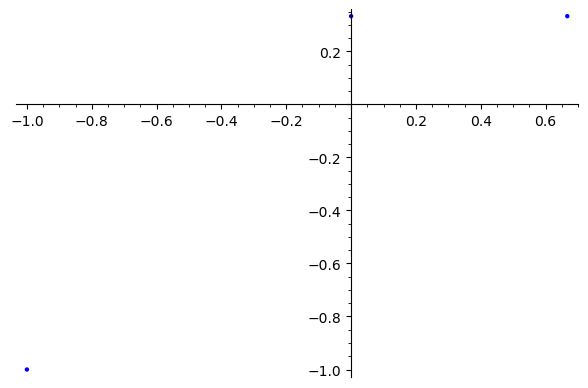

In [78]:
G = [vector([-1, -1]), vector([2/3, 1/3]), vector([0, 1/3])]
list_plot(G)
#tendremos que aproximar porque no estan alineados
#por tanto sumo las coordenadas

In [105]:
X = [-1, 2/3, 0] 
Y = [-1, 1/3, 1/3] 
XY = [1, 2/9, 0] 
X2 = [1, 4/9, 0]

In [106]:
Suma1 = 0
for i in range(0, 3):
    Suma1 = Suma1 + X[i]
Suma2 = 0
for i in range(0, 3):
    Suma2 = Suma2 + Y[i]
SumaXY = 0
for i in range(0, 3):
    SumaXY = SumaXY + XY[i]
SumaX2 = 0
for i in range(0, 3):
    SumaX2 = SumaX2 + X2[i]

In [107]:
#calculo la pendiente
Pendiente = (SumaXY-(Suma1 * Suma2)/3)/(SumaX2-(SumaX2)/3)
Pendiente

16/13

In [108]:
#ahora hago la intersecccion
Media1 = Suma1/3
Media2 = Suma2/3
b = Media2-Pendiente*Media1
show(b)

1/39

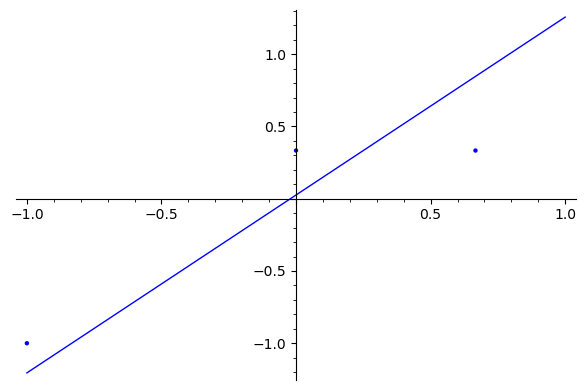

In [109]:
f(x) = Pendiente*x+b
plot(f(x))+list_plot(G)

----
#### **Ejercicio 91**.
Encuentra la parábola $y=a+bx+cx^2$ que mejor aproxime los puntos $(1, 0), (2, -1), (3, 0), (4, 2)$. Dibuja 